<a href="https://colab.research.google.com/github/shm-unesp/MecSol/blob/Python/airy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Funções de Airy**
 ----

Considere uma placa triangular com um carregamento crescendo linearmente conforme a figura abaixo, sendo a tensão $q_0$ (N/m$^2$) em $x=\ell$. 

Para a solução do campo de tensões na placa se propõe usar uma função de Airy candidata como:

$$\phi(x,y) =\mathcal Ax^3 + Bx^2y + Cxy^2 + Dy^3 $$


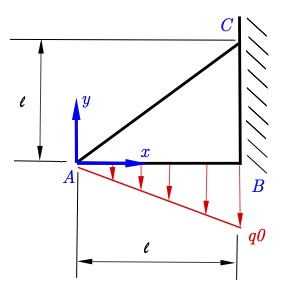

In [40]:
from IPython.display import Image, display
display(Image(filename='chapa.jpeg'))

In [19]:
!sudo dpkg --configure -a
!sudo apt-get update --fix-missing
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super # plot with latex fonts
!pip install colorblind

import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager
from matplotlib import rc

#Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main Sources [2,586 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,252 kB]
Get:14 http://arc

# 1. Verificando se a função $\phi(x,y)$ é uma função de Airy

$$\nabla^2(\nabla^2 \phi(x,y)) = \frac{{\partial^4 \phi}}{{\partial x^4}} + 2 \frac{{\partial^4 \phi}}{{\partial x^2 \partial y^2}} + \frac{{\partial^4 \phi}}{{\partial y^4}}$$

In [42]:
from sympy import  diff,symbols, Eq, solve,N

# Definir as variáveis simbólicas
x, y = symbols('x y')

# Definir os coeficientes simbólicos
A, B, C, D = symbols('A B C D')

# Definir a função phi
phi = A*x**3 + B*x**2*y + C*x*y**2 + D*y**3

# Exibir a função phi
print(phi)

# Verificando se phi é uma função biharmônica, i.e. se H = 0
H = diff(diff(phi,x,2) + diff(phi,y,2),x,2) + diff(diff(phi,x,2) + diff(phi,y,2),y,2) 

print(H)

A*x**3 + B*x**2*y + C*x*y**2 + D*y**3
0


#2. Cálculo do campo de tensões




In [43]:
# Calcular as tensões Sx, Sy e Sxy
Sx = diff(phi, y, 2)
Sy = diff(phi, x, 2)
Sxy = -diff(diff(phi, x), y)

# Exibir as tensões Sx, Sy, Sxy 
print('A tensão Sx é:')
print(Sx)

print('A tensão Sy é:')
print(Sy)

print('A tensão Sxy é:')
print(Sxy)

# Definir as variáveis simbólicas
q0, x, L = symbols('q0 x L')

# carregamento
q = -q0*x/L
print('Carregamento (N/m^2):')
print(q)

A tensão Sx é:
2*(C*x + 3*D*y)
A tensão Sy é:
2*(3*A*x + B*y)
A tensão Sxy é:
-2*B*x - 2*C*y
Carregamento (N/m^2):
-q0*x/L


#3. Aplicando as condições de contorno e calculando os coeficientes


In [44]:
# Face AB: quando y = 0
nAB = np.array([[0], [-1]])

# calculo do tensor das tensões na face AB quando y = 0 e 0<x<L
S_AB = np.array([[Sx.subs(y,0), Sxy.subs(y,0)], [Sxy.subs(y,0), Sy.subs(y,0)]])

# vetor tensão na face AB:
# Calcular o vetor de tensão tAB
tAB = np.dot(S_AB, nAB)

print('vetor tensão na face AB:')
print(tAB)

# Resolver as equações para encontrar os coeficientes
coef_B = solve(tAB[0], B)
coef_A = solve(tAB[1]-q, A)

print(coef_B)
print(coef_A)

# Obter os valores das soluções como números decimais
valor_A = N(coef_A[A])
valor_B = N(coef_B[B])

vetor tensão na face AB:
[[2*B*x]
 [-6*A*x]]
{B: 0}
{A: q0/(6*L)}


In [45]:
# Face AC: quando x = y
nAC = np.array([[-1/np.sqrt(2)], [1/np.sqrt(2)]])

# calculo do tensor das tensões na face AB quando x=y
S1 = Sx.subs([(y,x),(A,valor_A),(B,valor_B)])
S2= Sy.subs([(y,x),(A, valor_A), (B, valor_B)])
S12= Sxy.subs([(y,x),(A, valor_A), (B, valor_B)])

print(S2)
print(S12)

S_AC = np.array([[S1, S12], [S12, S2]])

# vetor tensão na face AC:
# Calcular o vetor de tensão tAC
tAC = np.dot(S_AC, nAC)

print('vetor tensão na face AC:')
print(tAC)

coef_C = solve(S2-S12,C)
print(coef_C)
valor_C = N(coef_C[0])

coef_D = solve(S1.subs(C,valor_C)-S12.subs(C,valor_C),D)
print(coef_D)
valor_D = N(coef_D[0])


1.0*q0*x/L
-2*C*x
vetor tensão na face AC:
[[-2.82842712474619*C*x - 4.24264068711928*D*x]
 [1.41421356237309*C*x + 0.707106781186547*q0*x/L]]
[-0.5*q0/L]
[0.333333333333333*q0/L]


In [46]:
# Face CB quando x = L

nCB = np.array([[1],[0]])

# calculo do tensor das tensões na face AB quando x=y
S1 = Sx.subs([(x,L),(A,valor_A),(B,valor_B),(C, valor_C),(D,valor_D)])
S2= Sy.subs([(x,L),(A, valor_A), (B, valor_B),(C, valor_C),(D,valor_D)])
S12= Sxy.subs([(x,L),(A, valor_A), (B, valor_B),(C, valor_C),(D,valor_D)])

S_CB = np.array([[S1, S12], [S12, S2]])

# vetor tensão na face B:
# Calcular o vetor de tensão tCB
tCB = np.dot(S_CB, nCB)

print('vetor tensão na face CB - reações na face engastada:')
print(tCB)


vetor tensão na face CB - reações na face engastada:
[[-1.0*q0 + 2.0*q0*y/L]
 [1.0*q0*y/L]]


# 4. Visualização do campo de tensões

In [47]:
# Campo de tensões 
Sx = Sx.subs([(A,valor_A),(B,valor_B),(C, valor_C),(D,valor_D)])
Sy= Sy.subs([(A, valor_A), (B, valor_B),(C, valor_C),(D,valor_D)])
Sxy= Sxy.subs([(A, valor_A), (B, valor_B),(C, valor_C),(D,valor_D)])

# Exibir as tensões Sx, Sy, Sxy 
print('A tensão Sx é:')
print(Sx)

print('A tensão Sy é:')
print(Sy)

print('A tensão Sxy é:')
print(Sxy)

A tensão Sx é:
-1.0*q0*x/L + 2.0*q0*y/L
A tensão Sy é:
q0*x/L
A tensão Sxy é:
1.0*q0*y/L


In [48]:
# Cálculo da Tensão de von Mises
L = 1
q0 = 10
N = 200
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)

xx, yy = np.meshgrid(x, y)

S_vm = np.zeros((N, N))  # Inicializar a matriz S_vm

for i in range(N):
    for j in range(N):
        if xx[i, j] <= yy[i, j]:
            S_vm[i, j] = np.nan
        else:
            # Estado de tensões
            Sx = -q0 / L * xx[i, j] + 2 * q0 * yy[i, j] / L
            Sy = q0 * xx[i, j] / L
            Sxy = q0 * yy[i, j] / L

            # Tensor das tensões
            S = np.array([[Sx, Sxy], [Sxy, Sy]])

            # Tensões Principais
            autovalores = np.linalg.eigvals(S)
            S1 = np.max(autovalores)
            S2 = np.min(autovalores)

            # Tensão de Von Mises
            S_vm[i, j] = np.sqrt(S1 ** 2 - S1 * S2 + S2 ** 2)


Mounted at /content/drive
/content
/content/drive/MyDrive/Colab Notebooks/MecSol


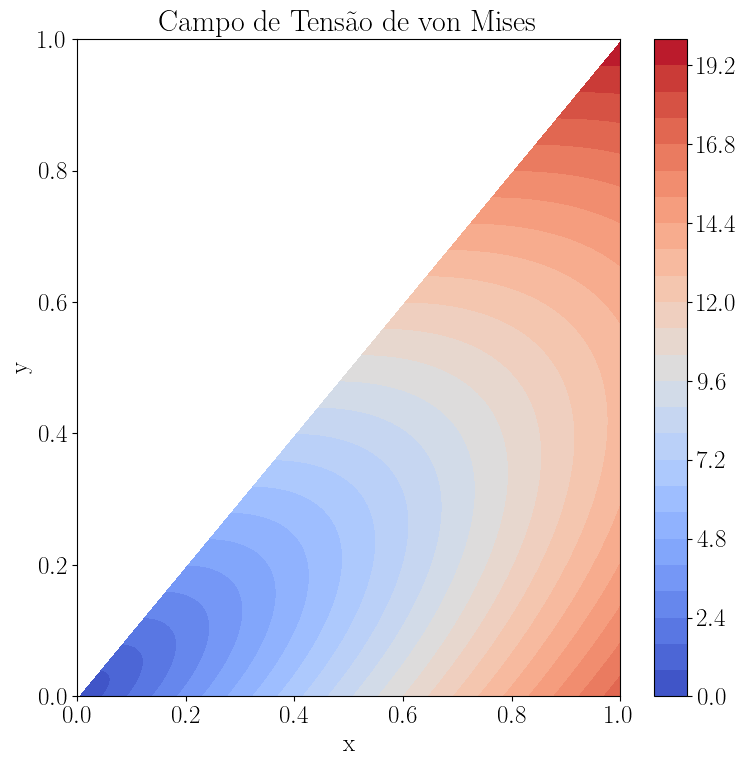

In [54]:
from google.colab import drive
drive.mount('/content/drive')

# Plot do campo de tensão de von Mises

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, S_vm, levels = 30, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Tensão de von Mises')
plt.tight_layout()

# Caminho do diretório no Google Drive
diretorio = '/content/drive/MyDrive/Colab Notebooks/MecSol'

# Verificar o diretório atual
print(os.getcwd())

# Alterar para o diretório desejado
os.chdir(diretorio)

# Verificar o diretório atual novamente
print(os.getcwd())

# Salvar a figura no diretório desejado
filename = 'tensoes.eps'
filepath = os.path.join(diretorio, filename)
plt.savefig(filepath, format='eps')
plt.show()